In [0]:
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import tensorflow as tf 
import os
from skimage import color
from skimage import io
import skimage
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelBinarizer 
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import random
import pickle
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
imagelist=[]
classname=[]
numclass=-1
imagelist1=[]
imagelist2=[]
path = "/content/drive/My Drive/Colab Notebooks/PokemonData"
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/PokemonData'):
    print(dirname)
    for filename in filenames:
        try:
            # print(os.path.join(dirname, filename))
            img = mpimg.imread(os.path.join(dirname, filename)).astype('float32') / 255
            # plt.imshow(img)
            # plt.show()
            # print(img.shape)
            # print(img)
            imagelist1.append(dirname[2:])
            imagelist2.append(os.path.join(dirname, filename))
            # if dirname not in classname:
            #     classname.append(dirname)
            #     imagelist.append([os.path.join(dirname, filename)])
            #     numclass+=1
            # else:
            #     imagelist[numclass].append(os.path.join(dirname, filename))
        except:
            pass

/content/drive/My Drive/Colab Notebooks/PokemonData
/content/drive/My Drive/Colab Notebooks/PokemonData/Alakazam
/content/drive/My Drive/Colab Notebooks/PokemonData/Blastoise
/content/drive/My Drive/Colab Notebooks/PokemonData/Arbok
/content/drive/My Drive/Colab Notebooks/PokemonData/Beedrill
/content/drive/My Drive/Colab Notebooks/PokemonData/Articuno
/content/drive/My Drive/Colab Notebooks/PokemonData/Abra
/content/drive/My Drive/Colab Notebooks/PokemonData/Alolan Sandslash
/content/drive/My Drive/Colab Notebooks/PokemonData/Arcanine
/content/drive/My Drive/Colab Notebooks/PokemonData/Aerodactyl
/content/drive/My Drive/Colab Notebooks/PokemonData/Bellsprout
/content/drive/My Drive/Colab Notebooks/PokemonData/Butterfree
/content/drive/My Drive/Colab Notebooks/PokemonData/Charmander
/content/drive/My Drive/Colab Notebooks/PokemonData/Cloyster
/content/drive/My Drive/Colab Notebooks/PokemonData/Charmeleon
/content/drive/My Drive/Colab Notebooks/PokemonData/Charizard
/content/drive/My Dr

In [0]:
imagedata = []
for i in range(0,len(imagelist2)):
    img = mpimg.imread(imagelist2[i]).astype('float32') / 255
    img = resize(img, (64,64,3))
    imagedata.append(img)

In [0]:
from sklearn.preprocessing import LabelBinarizer 
lb = LabelBinarizer()

imagelist1 = np.array(imagelist1)
imagelist1 = lb.fit_transform(imagelist1)
imagedata = np.array(imagedata)
print(imagedata.shape)

(6836, 64, 64, 3)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(imagedata, imagelist1, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5468, 64, 64, 3)
(5468, 150)
(1368, 64, 64, 3)
(1368, 150)


In [0]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(64, 64, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))


autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [0]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
activation_16 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)       

In [0]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=100, 
          batch_size=200, 
          validation_data=(X_test, X_test))


Epoch 1/100
28/28 [==============================] - 148s 5s/step - loss: 0.4513 - val_loss: 1.4845
Epoch 2/100
28/28 [==============================] - 148s 5s/step - loss: 0.4387 - val_loss: 0.6722
Epoch 3/100
28/28 [==============================] - 149s 5s/step - loss: 0.4377 - val_loss: 0.5234
Epoch 4/100
28/28 [==============================] - 148s 5s/step - loss: 0.4318 - val_loss: 0.5045
Epoch 5/100
28/28 [==============================] - 148s 5s/step - loss: 0.4285 - val_loss: 0.5173
Epoch 6/100
28/28 [==============================] - 147s 5s/step - loss: 0.4294 - val_loss: 0.5103
Epoch 7/100
28/28 [==============================] - 148s 5s/step - loss: 0.4269 - val_loss: 0.4931
Epoch 8/100
28/28 [==============================] - 148s 5s/step - loss: 0.4251 - val_loss: 0.4984
Epoch 9/100
28/28 [==============================] - 148s 5s/step - loss: 0.4244 - val_loss: 0.4841
Epoch 10/100
28/28 [==============================] - 147s 5s/step - loss: 0.4253 - val_loss: 0.4674

In [0]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 64, 64, 3))

In [0]:
predicted.shape

(10, 64, 64, 3)

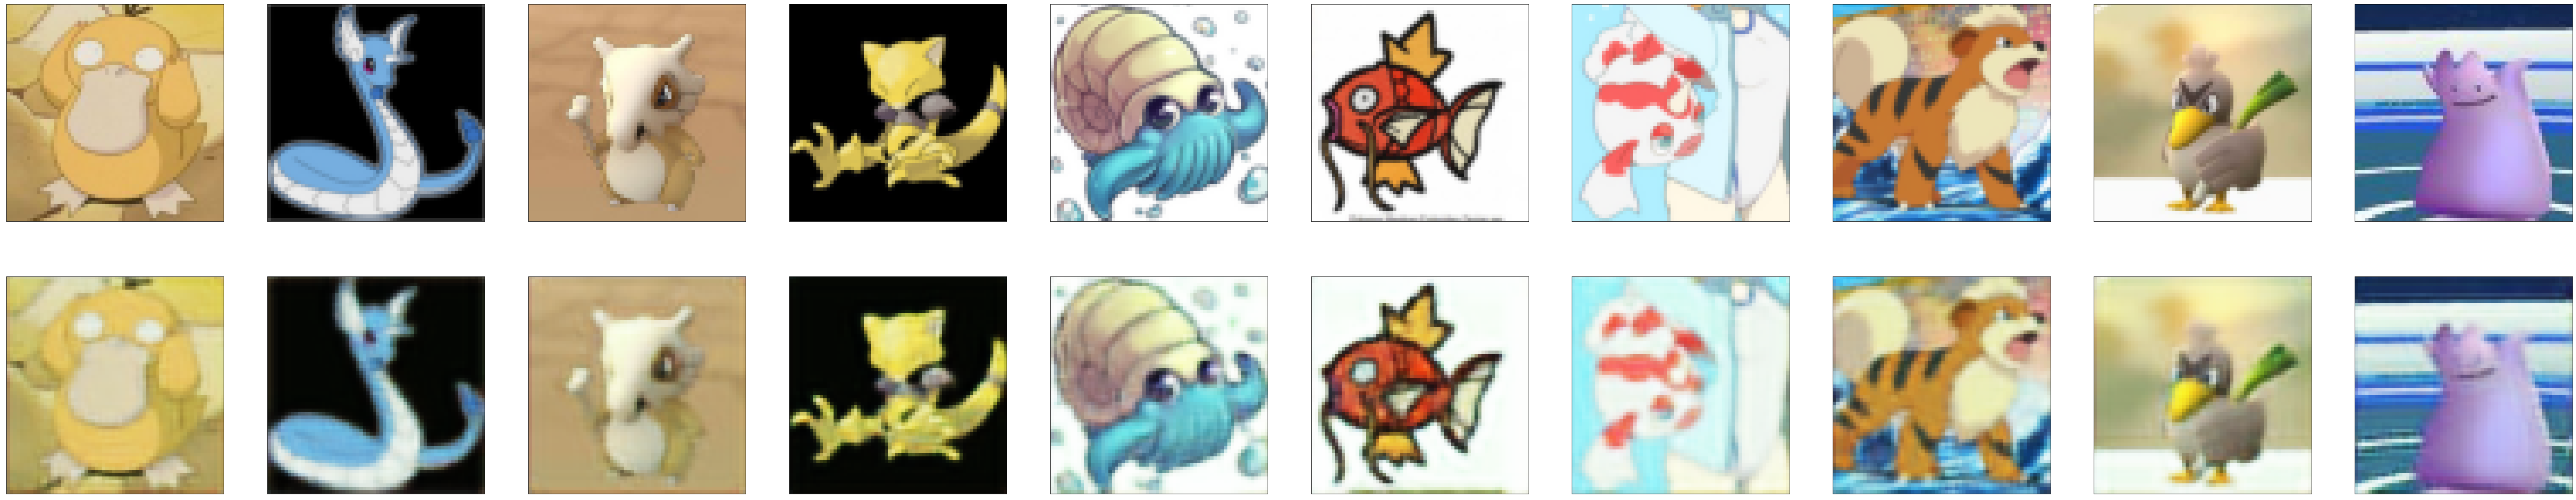

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(80,16))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((64, 64, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)